“Al entregar la solución de este parcial, yo,XXXXcon código YYYYYY me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial”.

# Enunciado
AlpesAir es una aerolínea con concentración en los Alpes, pero con un gran número de vuelos entrantes y salientes relacionados con destinos internacionales. Luego de dos años de baja productividad y con el ánimo de mejorar el servicio que da a sus pasajeros, decidió iniciar un proceso de mejora continua recolectando una serie de datos que pueden guiar las decisiones que deben tomar en el corto plazo. Es así, como, le ha compartido una muestra de datos con el fin de validar opciones de aplicar aprendizaje automático y ver si lo contratan para realizar este estilo de proyectos de consultoría buscando mejorar la calidad y como consecuencia de ello aumentar su productividad.

## 1. Definir enfoque analitico

Despues de explorar los datos y ver lo que el negocio desea, se decidió que el siguiente enfoque análitico para resolver el problema:
- Tipo de aprendizaje: Supervisado
- Tarea de aprendizaje: Clasificación
- Técnica de aprendizaje: Arbol de decisión
- Algoritmo: Entropía

Esta decisión es la decisión apropiada ya que los principales objetivos del proyecto son:
1. Conocer si la mayoría de sus pasajeros están satisfechos con el servicio
2. Detectar los elementos que están afectando dicha satisfacción

A traves de este enfoque analítico se puede obtner el primer objetivo al explorar los datos de la variable objetivo (en este caso satisfacción) y para el segundo objetivo a traves de este enfoque análitico se obtiene la importancia de los elementos medidos que estan afectando la satisfacción de los pasajeros.

# Librerias

In [1]:
# Cargar librerias

import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Entendimiento y perfilamiento de los datos

In [2]:
# Cargar datos

df_original = pd.read_csv('SatisfaccionAlpesAirMuestraEtapa2.csv', sep=';', encoding = 'utf-8', index_col=0)
df = df_original.copy()
print(df.shape)
df.head(5)

(1000, 15)


,Sexo,TipoCliente,Edad,TipoViaje,Clase,DistanciaREconomicarrida,SatServicioWifi,SatPuntualidad,SatComidaBebidas,ComodidadSilla,SatEntretenimiento,SatServicioAbordo,NivelLimpieza,MinRetrasoSalida,satisfaccion
id,,,,,,,,,,,,,,,
63296,M,Frecuente,16,Negocios,Ejecutiva,3192,3,2,300,3,3,3,3,31,neutro o insatisfecho
73453,F,Frecuente,7,Personal,Economica,1012,3,5,5,2,5,2,5,26,neutro o insatisfecho
1316,F,Frecuente,39,Negocios,Ejecutiva,2204,1,1,3,4,4,4,3,0,satisfecho
128845,F,Frecuente,9,Personal,Economica,2475,4,2,4,5,1,5,5,0,neutro o insatisfecho
32338,M,Frecuente,56,Negocios,Ejecutiva,3344,0,5,3,4,2,2,5,0,satisfecho


In [3]:
# Arreglar titulo columna DistanciaRecorrida

df['DistanciaRecorrida'] = df['DistanciaREconomicarrida']
df = df.drop('DistanciaREconomicarrida', axis = 1)
df.head(5)

,Sexo,TipoCliente,Edad,TipoViaje,Clase,SatServicioWifi,SatPuntualidad,SatComidaBebidas,ComodidadSilla,SatEntretenimiento,SatServicioAbordo,NivelLimpieza,MinRetrasoSalida,satisfaccion,DistanciaRecorrida
id,,,,,,,,,,,,,,,
63296,M,Frecuente,16,Negocios,Ejecutiva,3,2,300,3,3,3,3,31,neutro o insatisfecho,3192
73453,F,Frecuente,7,Personal,Economica,3,5,5,2,5,2,5,26,neutro o insatisfecho,1012
1316,F,Frecuente,39,Negocios,Ejecutiva,1,1,3,4,4,4,3,0,satisfecho,2204
128845,F,Frecuente,9,Personal,Economica,4,2,4,5,1,5,5,0,neutro o insatisfecho,2475
32338,M,Frecuente,56,Negocios,Ejecutiva,0,5,3,4,2,2,5,0,satisfecho,3344


In [4]:
# Identificar los tipos de datos

df.dtypes

Sexo                  object
TipoCliente           object
Edad                   int64
TipoViaje             object
Clase                 object
SatServicioWifi        int64
SatPuntualidad        object
SatComidaBebidas       int64
ComodidadSilla         int64
SatEntretenimiento     int64
SatServicioAbordo      int64
NivelLimpieza          int64
MinRetrasoSalida       int64
satisfaccion          object
DistanciaRecorrida     int64
dtype: object

In [5]:
# Analizar la completitud de los datos

df.isna().sum()

Sexo                  0
TipoCliente           0
Edad                  0
TipoViaje             0
Clase                 0
SatServicioWifi       0
SatPuntualidad        0
SatComidaBebidas      0
ComodidadSilla        0
SatEntretenimiento    0
SatServicioAbordo     0
NivelLimpieza         0
MinRetrasoSalida      0
satisfaccion          0
DistanciaRecorrida    0
dtype: int64

In [6]:
# Analizar la duplicidad de los datos

df.duplicated().sum()

0

<AxesSubplot:>

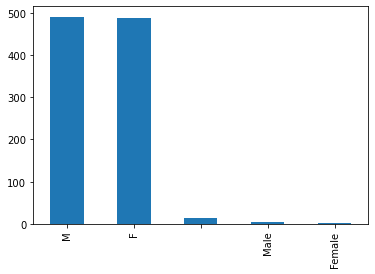

In [7]:
# Analizar distribución y validez de las variables categoricas

df["Sexo"].value_counts().plot(kind='bar')

<AxesSubplot:>

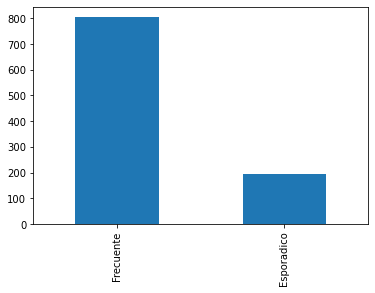

In [8]:
df["TipoCliente"].value_counts().plot(kind='bar')

<AxesSubplot:>

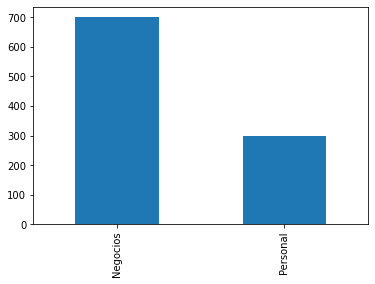

In [9]:
df["TipoViaje"].value_counts().plot(kind='bar')

<AxesSubplot:>

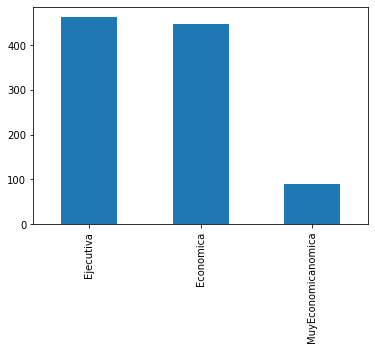

In [10]:
df["Clase"].value_counts().plot(kind='bar')

<AxesSubplot:>

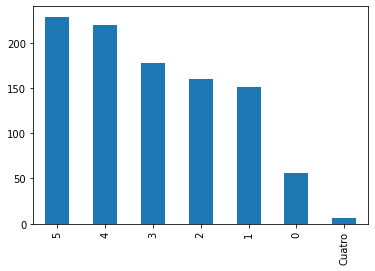

In [11]:
df["SatPuntualidad"].value_counts().plot(kind='bar')

<AxesSubplot:>

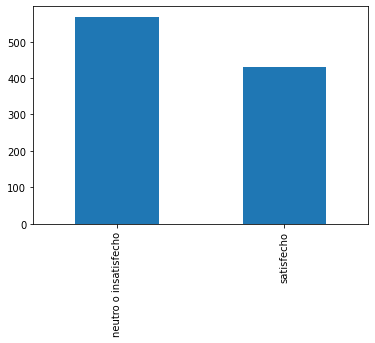

In [12]:
df["satisfaccion"].value_counts().plot(kind='bar')

In [13]:
# Analizar validez y distribución de las variables numericas

df.describe()

,Edad,SatServicioWifi,SatComidaBebidas,ComodidadSilla,SatEntretenimiento,SatServicioAbordo,NivelLimpieza,MinRetrasoSalida,DistanciaRecorrida
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000
mean,39.643000,2.701000,4.965000,3.413000,3.349000,3.3340,3.243000,16.082000,1183.202000
std,15.386953,1.357734,22.971972,1.317637,1.320205,1.3146,1.322006,44.380885,996.901015
min,7.000000,0.000000,0.000000,1.000000,1.000000,-1.0000,1.000000,0.000000,67.000000
25%,27.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,0.000000,412.500000
50%,40.000000,3.000000,3.000000,4.000000,4.000000,4.0000,3.000000,0.000000,850.500000
75%,52.000000,4.000000,4.000000,4.000000,4.000000,4.0000,4.000000,14.000000,1739.000000
max,80.000000,5.000000,300.000000,5.000000,5.000000,5.0000,5.000000,794.000000,3995.000000


<AxesSubplot:xlabel='Edad'>

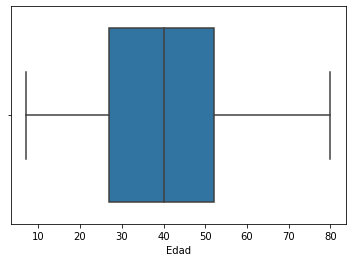

In [14]:
# Visualizar distribución de variables numericas

sns.boxplot(x=df["Edad"])

<AxesSubplot:xlabel='MinRetrasoSalida'>

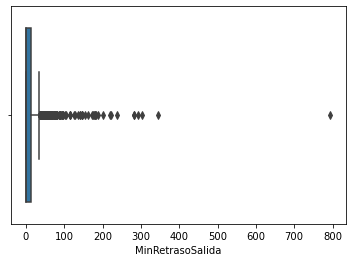

In [15]:
sns.boxplot(x=df["MinRetrasoSalida"])

<AxesSubplot:xlabel='DistanciaRecorrida'>

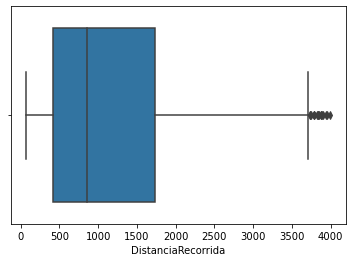

In [16]:
sns.boxplot(x=df["DistanciaRecorrida"])

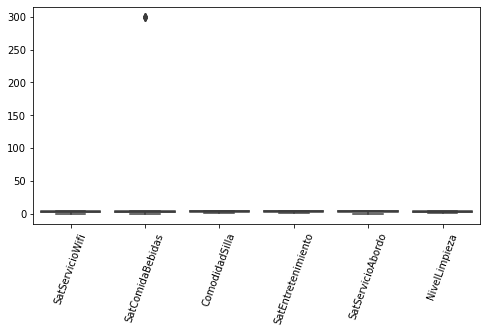

In [17]:
fig=plt.figure(figsize=(8,4))
ax = sns.boxplot(data=df[['SatServicioWifi', 'SatPuntualidad', 'SatComidaBebidas', 'ComodidadSilla', 'SatEntretenimiento', 'SatServicioAbordo', 'NivelLimpieza']])
d = ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)

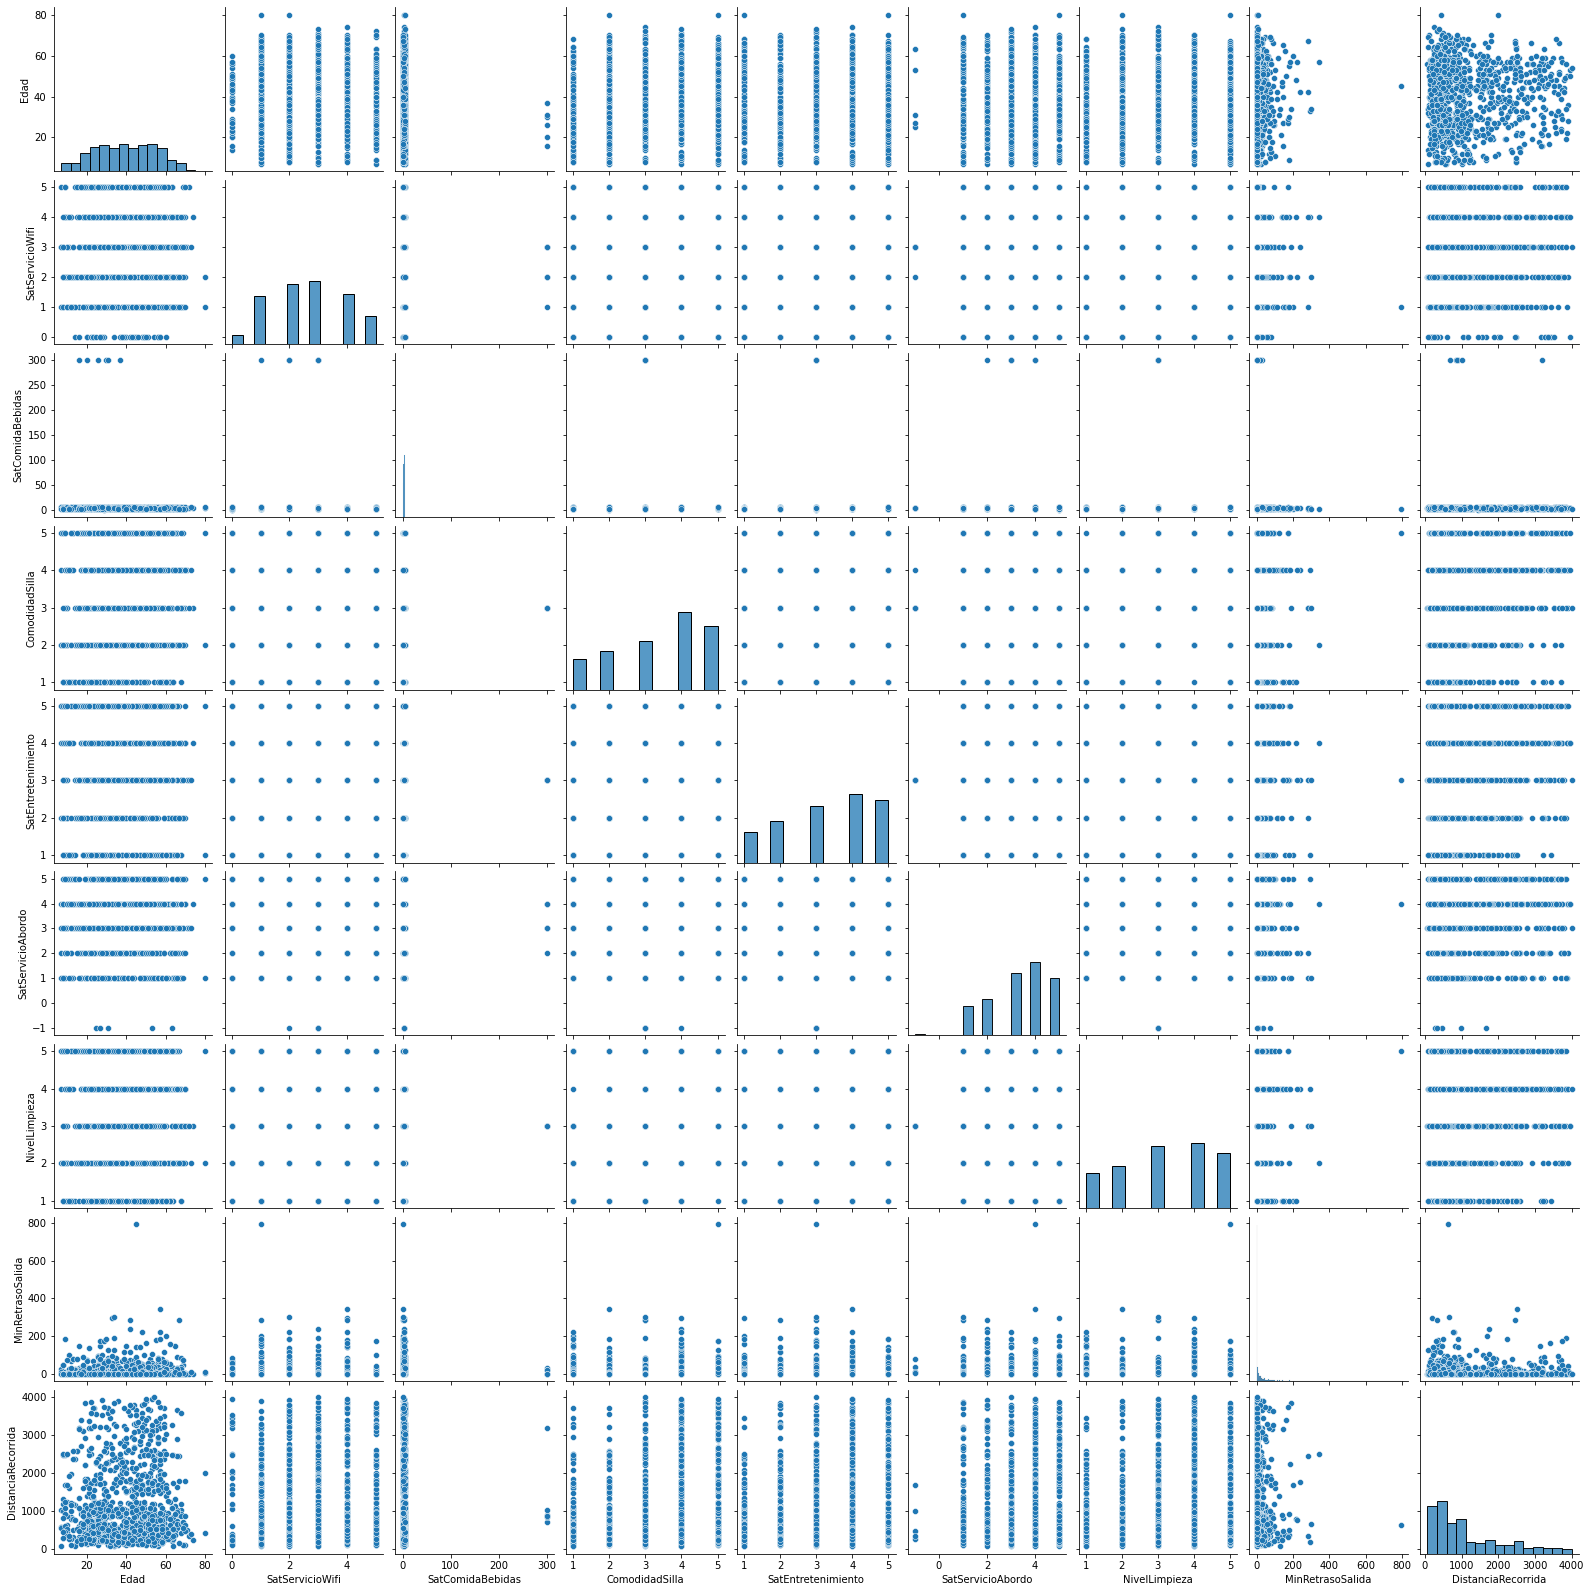

In [18]:
# Visualizar relaciones entre variables numericas

sns.pairplot(df)

# Preparación de los datos

In [40]:
# Se eliminan los datos duplicados

df_prep = df.drop_duplicates()

<AxesSubplot:>

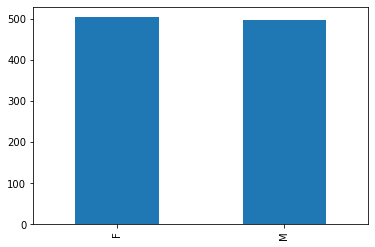

In [41]:
# Arreglar datos invalidos en la variable sexo

df_prep.loc[df_prep.Sexo.str.contains("Male"), 'Sexo']= "M"
df_prep.loc[df_prep.Sexo.str.contains("Female"), 'Sexo']= "F"

# Se decide para la tercera categoria, ya que no contiene una cantidad de datos significativos incluirlos en F
df_prep.loc[df_prep.Sexo.str.contains(" "), 'Sexo']= "F"

df_prep["Sexo"].value_counts().plot(kind='bar')

<AxesSubplot:>

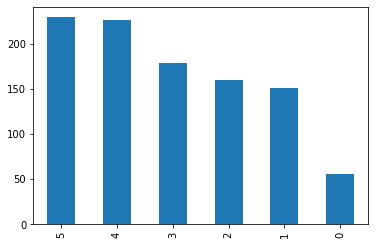

In [42]:
# Arreglar datos invalidos en la variable SatPuntualidad

df_prep.loc[df_prep.SatPuntualidad.str.contains("Cuatro"), 'SatPuntualidad']= "4"

df_prep["SatPuntualidad"].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='SatPuntualidad'>

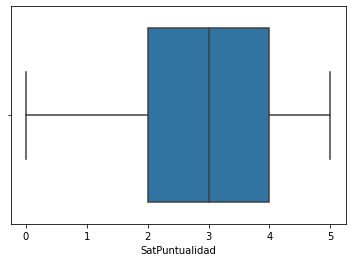

In [43]:
# Convertir variable SatPuntualidad a numerica (Ya que debería ser así)

df_prep['SatPuntualidad'] = df_prep['SatPuntualidad'].str.extract('(\d+)', expand=False)
df_prep['SatPuntualidad'] = df_prep['SatPuntualidad'].astype('float64')
df_prep['SatPuntualidad']

sns.boxplot(x=df_prep["SatPuntualidad"])

<AxesSubplot:xlabel='SatComidaBebidas'>

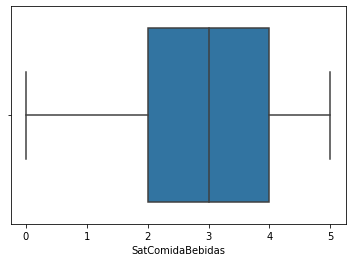

In [45]:
# Arreglar datos invalidos en coloumna SatComidaBebidas (Se asume que 300 se referia a 3)

df_prep.loc[df_prep.SatComidaBebidas == 300, 'SatComidaBebidas']= 3

sns.boxplot(x=df_prep["SatComidaBebidas"])

<AxesSubplot:xlabel='SatComidaBebidas'>

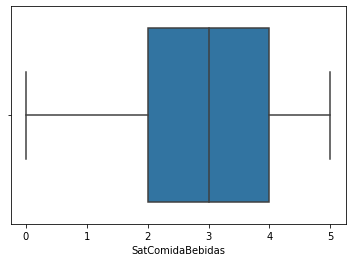

In [46]:
# Arreglar datos invalidos en coloumna SatServicioAbordo (Se asume que -1 se referia a 1)

df_prep.loc[df_prep.SatComidaBebidas == -1, 'SatComidaBebidas']= 1

sns.boxplot(x=df_prep["SatComidaBebidas"])

Para la columna "Clase" se asume que la categoria negocios se refiere a ejecutiva

## 2. Analisis de calidad de los datos y preprocesamiento

Como se pudo notar en la fase de perfilamiento y entendimiento de los datos los datos suministrados muestran un nivel de calidad alta ya que se encuentran completos, tienen un 100% de unicidad y tienen un alto nivel de validez en su mayoría. Con respecto a la validez, habían unos pocos casos de datos invaidos pero que en su mayoría tenian una intención clara, con excepción de la variable "Sexo" donde la cantidad de datos con intención poco clara no eran significativos y por lo tanto ponerlos en una clase valida no se considera que tenga un efecto sobre el proyecto.

Se siguio un procedimiento de preparación de los datos donde se arreglo mas que todo la validez de los datos a traves de cambiar los datos segun la intención de respuesta y cambiar variables que deberian ser numericas. También se incorporo un paso de asignar un numero a las variables categoricas ya que esto es necesario para la tarea de aprendizaje escogida.

A continuación se muestra un subconjunto de los datos un subconjunto de los datos luego del pre-procesamiento:

In [48]:
# Transformar datos categoricos con label encoder (Categorica)

label_encoder = LabelEncoder()
df_prep["Sexo"] = label_encoder.fit_transform(df_prep["Sexo"])
df_prep["TipoCliente"] = label_encoder.fit_transform(df_prep["TipoCliente"])
df_prep["TipoViaje"] = label_encoder.fit_transform(df_prep["TipoViaje"])
df_prep["Clase"] = label_encoder.fit_transform(df_prep["Clase"])
df_prep["satisfaccion"] = label_encoder.fit_transform(df_prep["satisfaccion"])

df_prep.head()

,Sexo,TipoCliente,Edad,TipoViaje,Clase,SatServicioWifi,SatPuntualidad,SatComidaBebidas,ComodidadSilla,SatEntretenimiento,SatServicioAbordo,NivelLimpieza,MinRetrasoSalida,satisfaccion,DistanciaRecorrida
id,,,,,,,,,,,,,,,
63296,1,1,16,0,1,3,2.0,3,3,3,3,3,31,0,3192
73453,0,1,7,1,0,3,5.0,5,2,5,2,5,26,0,1012
1316,0,1,39,0,1,1,1.0,3,4,4,4,3,0,1,2204
128845,0,1,9,1,0,4,2.0,4,5,1,5,5,0,0,2475
32338,1,1,56,0,1,0,5.0,3,4,2,2,5,0,1,3344


# Modelamiento

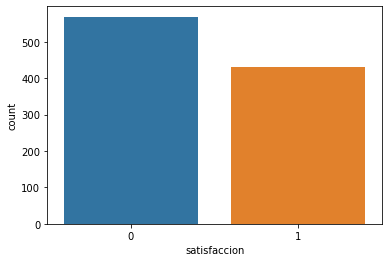

In [50]:
# Visualizar distribución de datos en la variable objetivo (satifecho = 1 y neutral o insatisfecho = 0)

ax = sns.countplot(x='satisfaccion', data=df_prep)

In [52]:
# Seleccionar variable objetivo

Y = df_prep['satisfaccion']

In [53]:
# Eliminar variable objetivo del conjunto

X = df_prep.drop(['satisfaccion'], axis=1)

Shape of X before SMOTE: (1000, 14)
Hape of X after SMOTE: (1138, 14)

Balance of positive and negative classes (%):


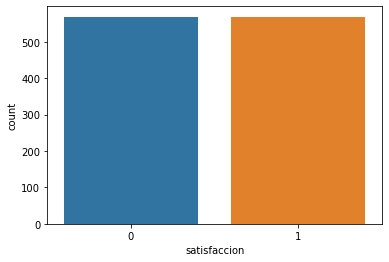

In [57]:
# Aplicar tecnica de smote para valanciar la variable objetivo

sm = SMOTE(random_state=0)

X_sm, Y_sm = sm.fit_resample(X,Y)

print(f'''Shape of X before SMOTE: {X.shape}
Hape of X after SMOTE: {X_sm.shape}''')
print("\nBalance of positive and negative classes (%):")
Y_sm.value_counts(normalize=True)*100

ax = sns.countplot(x='satisfaccion', data=pd.DataFrame(Y_sm, columns=['satisfaccion']))

In [58]:
# Dividir datos en entrenamiento (80%) y test (20%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [59]:
# Crear el objeto de arbol de decisión utilizando como criterio de pureza la entropía

arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [60]:
# Entrenar el modelo con los datos de entrenamiento

arbol = arbol.fit(X_train,Y_train)

In [61]:
# Determinar las predicciones del modelo sobre el conjunto de prueba

y_pred = arbol.predict(X_test)

In [62]:
# Generar matriz de confusión

confusion_matrix(Y_test, y_pred)

array([[103,  12],
       [  9,  76]])

/Users/pedrovallejoseade/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


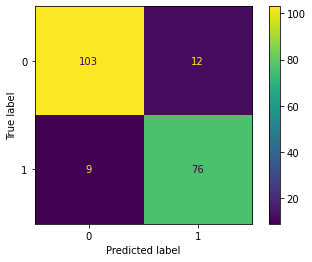

In [63]:
# Visualizar matriz de confusión
    
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()

In [64]:
# Mostrar reporte de clasificación

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       115
           1       0.86      0.89      0.88        85

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



In [65]:
# Obtener importancia de las variables

importancia= arbol.feature_importances_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,SatServicioWifi,0.327560
1,Clase,0.173011
2,SatEntretenimiento,0.097134
3,DistanciaRecorrida,0.080191
4,TipoViaje,0.061644
5,TipoCliente,0.049741
6,ComodidadSilla,0.044820
7,Edad,0.040095
8,NivelLimpieza,0.037789
9,SatPuntualidad,0.031438


In [66]:
# Fijar el número de particiones

particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [67]:
# Establecer el espacio de búsqueda para los hiperparámetros que deseamos ajustar.

param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

In [68]:
# Definir el modelo sin ningún valor de estos hiperparámetros

arbol = DecisionTreeClassifier(random_state=0)

In [69]:
# Utilizar GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)

# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [70]:
GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [71]:
# Ver cuales son los mejores valores para los hiperaparametros

mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 4}

In [72]:
# Obtener el mejor modelo.

arbol_final = mejor_modelo.best_estimator_

In [73]:
# Poner modelo a prueba

y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)

In [74]:
# Generar matriz de confusión

confusion_matrix(Y_test, y_pred_test)

array([[102,  13],
       [ 10,  75]])

/Users/pedrovallejoseade/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


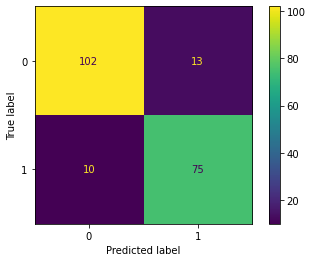

In [75]:
# Visualizar la matriz de confusión
    
plot_confusion_matrix(arbol_final, X_test, Y_test)  
plt.show()

In [76]:
# Mostrar metricas

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))
print("Recall: {}".format(recall_score(Y_test,y_pred_test)))
print("Precisión: {}".format(precision_score(Y_test,y_pred_test)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred_test)))

Exactitud sobre entrenamiento: 0.94
Exactitud sobre test: 0.89
Recall: 0.8823529411764706
Precisión: 0.8522727272727273
Puntuación F1: 0.8670520231213872


In [77]:
# Mostrar reporte de clasificación

print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       115
           1       0.85      0.88      0.87        85

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



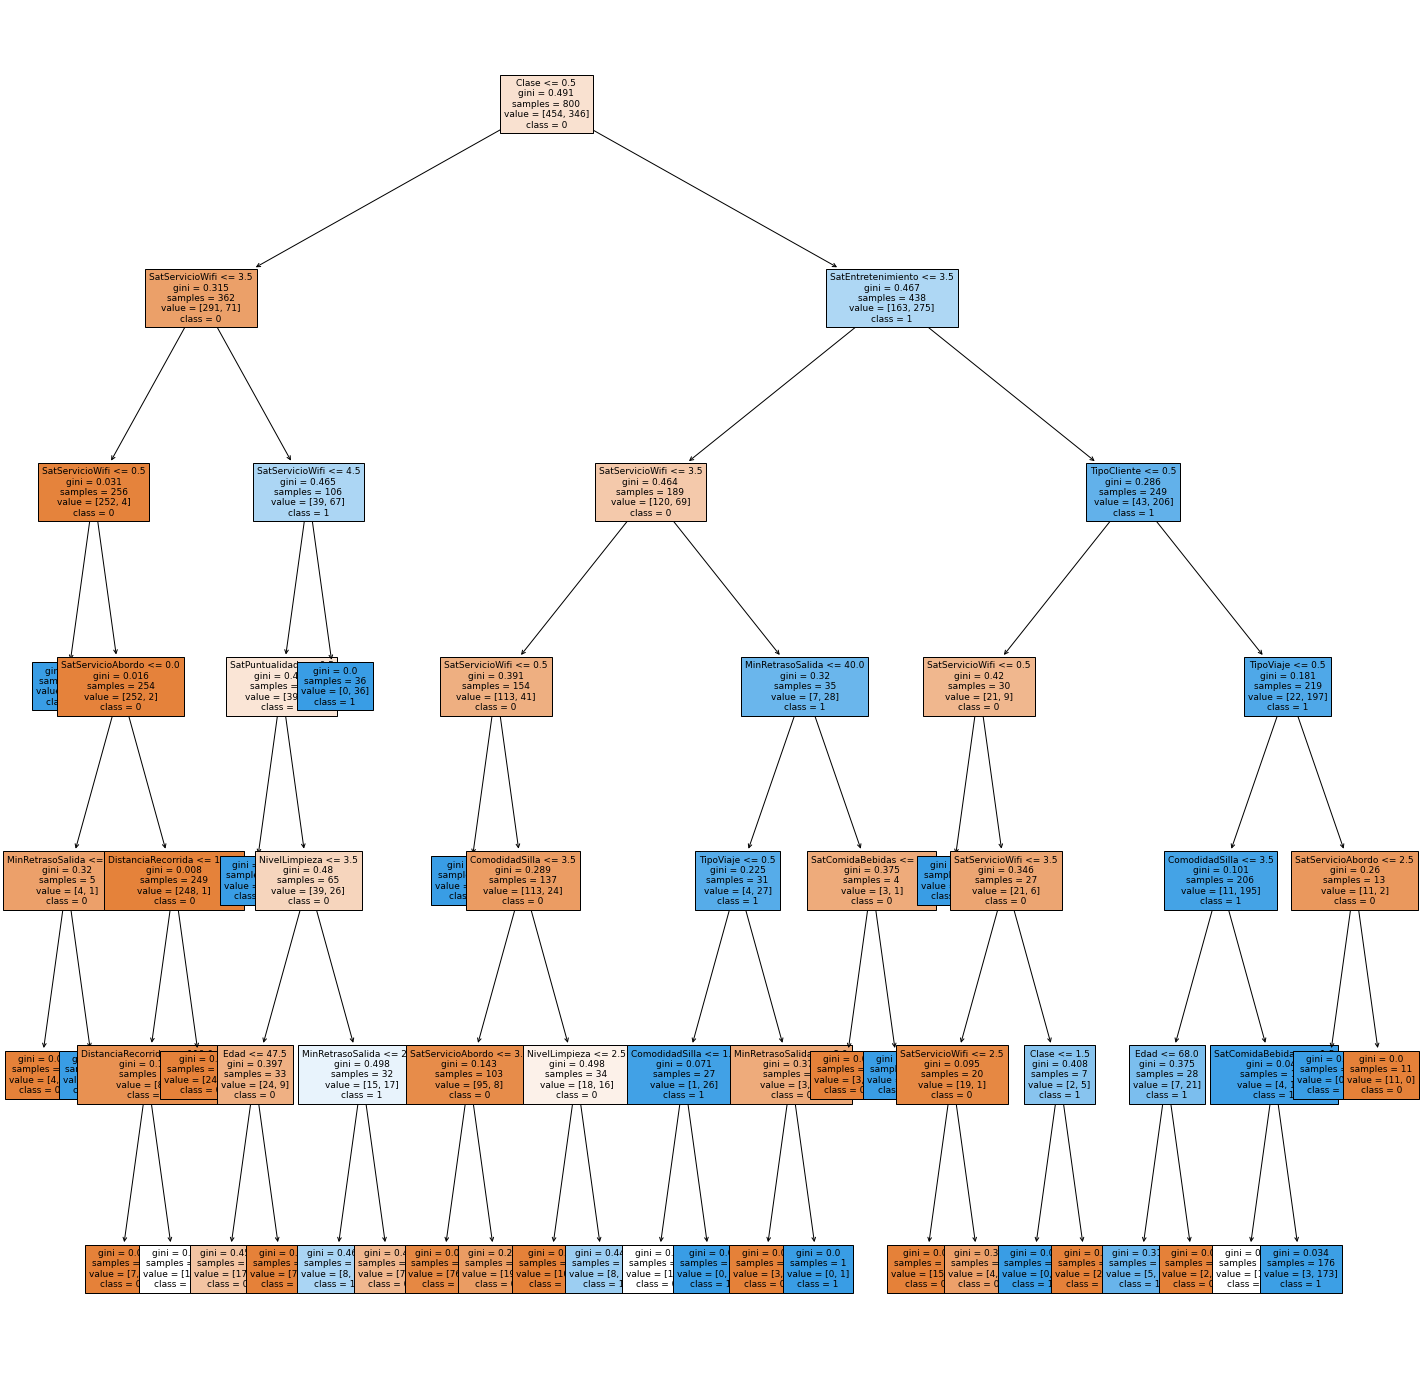

In [84]:
# Dibujar arbol de decisión

fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(arbol_final, max_depth=6, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9) 

## 3. Resultados

Como se puede ver posteriormente estos son los resultados arrojados por el modelo de analitica propuesto.

Se puede notar que el resultado obtenido efectivamente responde a los obtetivos de la organización ya que en primer lugar como se pudo evidenciar al graficar la variable objetivo antes de el balanceo de los datos, la mayoría de los clientes se encuentran insatisfecos con los servicios. Y en segundo lugar, se pudo determinar los elementos mas influyentes en la satisfacción de los clientes, los cuales son principalmente: Satisfacción con los servicios WIFI, clase, satisfacción con los servicios de entretenimiento y la distancia recorrida (La lista completa en orden se encuentra posteriormente al analizar las importancias).

Por otro lado, debido a las altas metricas obtenidas en el reporte de clasificación, se considera que este modelo ya es suficientemente preciso para ser usado bajo condiciones de producción.

